In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# DATA COLLECTION

In [2]:
train_data=pd.read_csv('winetrain.csv')

In [3]:
train_data

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec
5,@wineschach,Argentina,Andean 2005 Finca La Escondida Reserva Caberne...,"Strident aromas of licorice, herbs, berries an...",Finca La Escondida Reserva,85,13.0,Other,San Juan,NaN,Andean,Cabernet Sauvignon
6,@wawinereport,US,Gordon Estate 2012 Tradition Red (Columbia Val...,"Half Syrah and half Cabernet Sauvignon, with 4...",Tradition,91,45.0,Washington,Columbia Valley (WA),Columbia Valley,Gordon Estate,Red Blend
7,@vboone,US,Rock Wall 2014 Monte Rosso Reserve Zinfandel (...,"High-toned red fruit stars in this wine, a nic...",Monte Rosso Reserve,90,50.0,California,Sonoma County,Sonoma,Rock Wall,Zinfandel
8,@paulgwine,US,Elizabeth Chambers 2014 Falcon Glen Vineyard P...,"Displaying typical McMinnville AVA subtlety, t...",Falcon Glen Vineyard,91,48.0,Oregon,McMinnville,Willamette Valley,Elizabeth Chambers,Pinot Noir
9,@kerinokeefe,Italy,Mannucci Droandi 2009 Ceppeto Riserva (Chiant...,This blend of Sangiovese and 10% Merlot opens ...,Ceppeto Riserva,86,31.0,Tuscany,Chianti Classico,NaN,Mannucci Droandi,Red Blend


In [4]:
train_data.isnull().any()
#checking weather any null value is present column wise or not

user_name              True
country                True
review_title          False
review_description    False
designation            True
points                False
price                  True
province               True
region_1               True
region_2               True
winery                False
variety               False
dtype: bool

In [5]:
train_data.duplicated().any()

True

In [6]:
unique_data=train_data[train_data.duplicated('review_description',keep=False)]

In [7]:
unique_data.describe()

,points,price
count,10058.000000,9488.000000
mean,88.596639,33.619203
std,2.360234,25.422272
min,82.000000,5.000000
25%,87.000000,18.000000
50%,88.000000,26.000000
75%,90.000000,42.000000
max,97.000000,450.000000


In [8]:
unique_data.isnull().any()

user_name              True
country                True
review_title          False
review_description    False
designation            True
points                False
price                  True
province               True
region_1               True
region_2               True
winery                False
variety               False
dtype: bool

# Pre Processing

In [9]:
train_review=unique_data['review_description'].str.lower()

In [10]:
train_review

8        displaying typical mcminnville ava subtlety, t...
12       produced from henry fessy's own cru vineyards,...
26       strong but pleasant oak-based aromas of sandal...
27       this young, textured wine shows a mix of stron...
35       the nose is very quiet but the body emanates a...
38       this is a softer sauvignon blanc for those not...
39       bennett valley is a cooler section of sonoma c...
49       this syrah is hard and tannic now, and it will...
59       subdued but classic nebbiolo aromas of red ber...
60       very light and summery on the nose, this bottl...
69       here's a unique blend of two of campania's lit...
77       tight and crisp initially, this wine opens up ...
88       structured, this oozes blackberry fruitiness a...
92       ripe and juicy, this dense wine offers red-fru...
101      there's just not much here. the strawberry fru...
106      a soft wood- and almond-flavored wine. it miss...
110      this is a fruity wine with its typical touch o.

In [11]:
train_variety=unique_data['variety'].values

In [12]:
train_variety

array(['Pinot Noir', 'Gamay', 'Malbec', ..., 'Rhône-style Red Blend',
       'Malbec', 'Bordeaux-style Red Blend'], dtype=object)

# Label Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
label_variety=LabelEncoder()

In [15]:
label_variety.fit(train_variety)

LabelEncoder()

In [16]:
train_variety_labelled=label_variety.transform(train_variety)

In [17]:
train_variety_labelled

array([14,  6,  9, ..., 18,  9,  0])

# Processing reviews uisng NLP

In [18]:
from nltk.corpus import stopwords

In [19]:
from nltk.tokenize import word_tokenize

In [20]:
stop_words=list(set(stopwords.words('english')))+[',','.','!',';',':','\'s','%']

In [21]:
stop_words

['then',
 'by',
 'didn',
 'aren',
 'won',
 'down',
 'them',
 'been',
 'isn',
 'does',
 'for',
 'hadn',
 'which',
 "wouldn't",
 'against',
 'below',
 'so',
 'haven',
 'needn',
 'that',
 'i',
 'ours',
 'off',
 'once',
 'most',
 'with',
 'this',
 'as',
 'through',
 't',
 'yourself',
 'm',
 'hers',
 'having',
 'itself',
 'him',
 'and',
 'mightn',
 'those',
 'if',
 'themselves',
 'on',
 'was',
 "didn't",
 'it',
 'our',
 "hasn't",
 'couldn',
 'under',
 "weren't",
 'he',
 'not',
 'between',
 "doesn't",
 'to',
 'who',
 "hadn't",
 'should',
 're',
 "shan't",
 "mustn't",
 'y',
 'ain',
 'they',
 'shouldn',
 'do',
 'are',
 'in',
 'no',
 "don't",
 'after',
 'own',
 'of',
 "she's",
 'be',
 'or',
 'into',
 "it's",
 'is',
 'we',
 'have',
 'before',
 'you',
 'during',
 'nor',
 "haven't",
 'himself',
 'from',
 'my',
 "mightn't",
 'being',
 'ourselves',
 'an',
 "wasn't",
 "isn't",
 'his',
 'its',
 'any',
 'over',
 'weren',
 "should've",
 'because',
 'mustn',
 'myself',
 'out',
 'some',
 'too',
 'when',
 

In [22]:
for i in range(len(train_review)):
    train_review.iloc[i]=word_tokenize(train_review.iloc[i])
    train_review.iloc[i]=[w for w in train_review.iloc[i] if not w in stop_words]
    train_review.iloc[i]=" ".join(train_review.iloc[i])

In [23]:
train_review

8        displaying typical mcminnville ava subtlety fr...
12       produced henry fessy cru vineyards wine fruity...
26       strong pleasant oak-based aromas sandalwood co...
27       young textured wine shows mix strong mineralit...
35       nose quiet body emanates generosity despite li...
38       softer sauvignon blanc sworn grassy side grape...
39       bennett valley cooler section sonoma county ma...
49       syrah hard tannic always hard tannic quite imp...
59       subdued classic nebbiolo aromas red berry crus...
60       light summery nose bottling shows aromas yello...
69       unique blend two campania little known grapes ...
77       tight crisp initially wine opens spice ripe fl...
88       structured oozes blackberry fruitiness well ba...
92       ripe juicy dense wine offers red-fruit flavors...
101      much strawberry fruit wispy thin acids tart ta...
106      soft wood- almond-flavored wine misses fresh f...
110      fruity wine typical touch sweetness lively str.

# Vectorization

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
vect=TfidfVectorizer()

In [26]:
vect.fit(train_review)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [27]:
train_vector=vect.transform(train_review)

In [28]:
train_vector=train_vector.toarray()

# Splitting data into dependent and independent variables

In [29]:
x=train_vector

In [30]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
y=train_variety_labelled

In [32]:
y

array([14,  6,  9, ..., 18,  9,  0])

# Train Test Split

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

# Model Training

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
cls=RandomForestClassifier()

In [37]:
cls.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
prediction=cls.predict(x_test)

# Model Validation

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        54
           1       1.00      0.75      0.86         8
           2       1.00      0.87      0.93        15
           3       0.94      1.00      0.97        74
           4       1.00      1.00      1.00        14
           5       0.91      1.00      0.95       105
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00        11
           8       1.00      1.00      1.00        13
           9       1.00      1.00      1.00        29
          10       1.00      0.90      0.95        30
          11       0.93      0.86      0.89        29
          12       1.00      1.00      1.00         8
          13       1.00      0.85      0.92        13
          14       0.88      1.00      0.94       118
          15       0.94      0.89      0.91        35
          16       1.00      1.00      1.00         9
          17       0.90    

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
import matplotlib.pyplot as plt

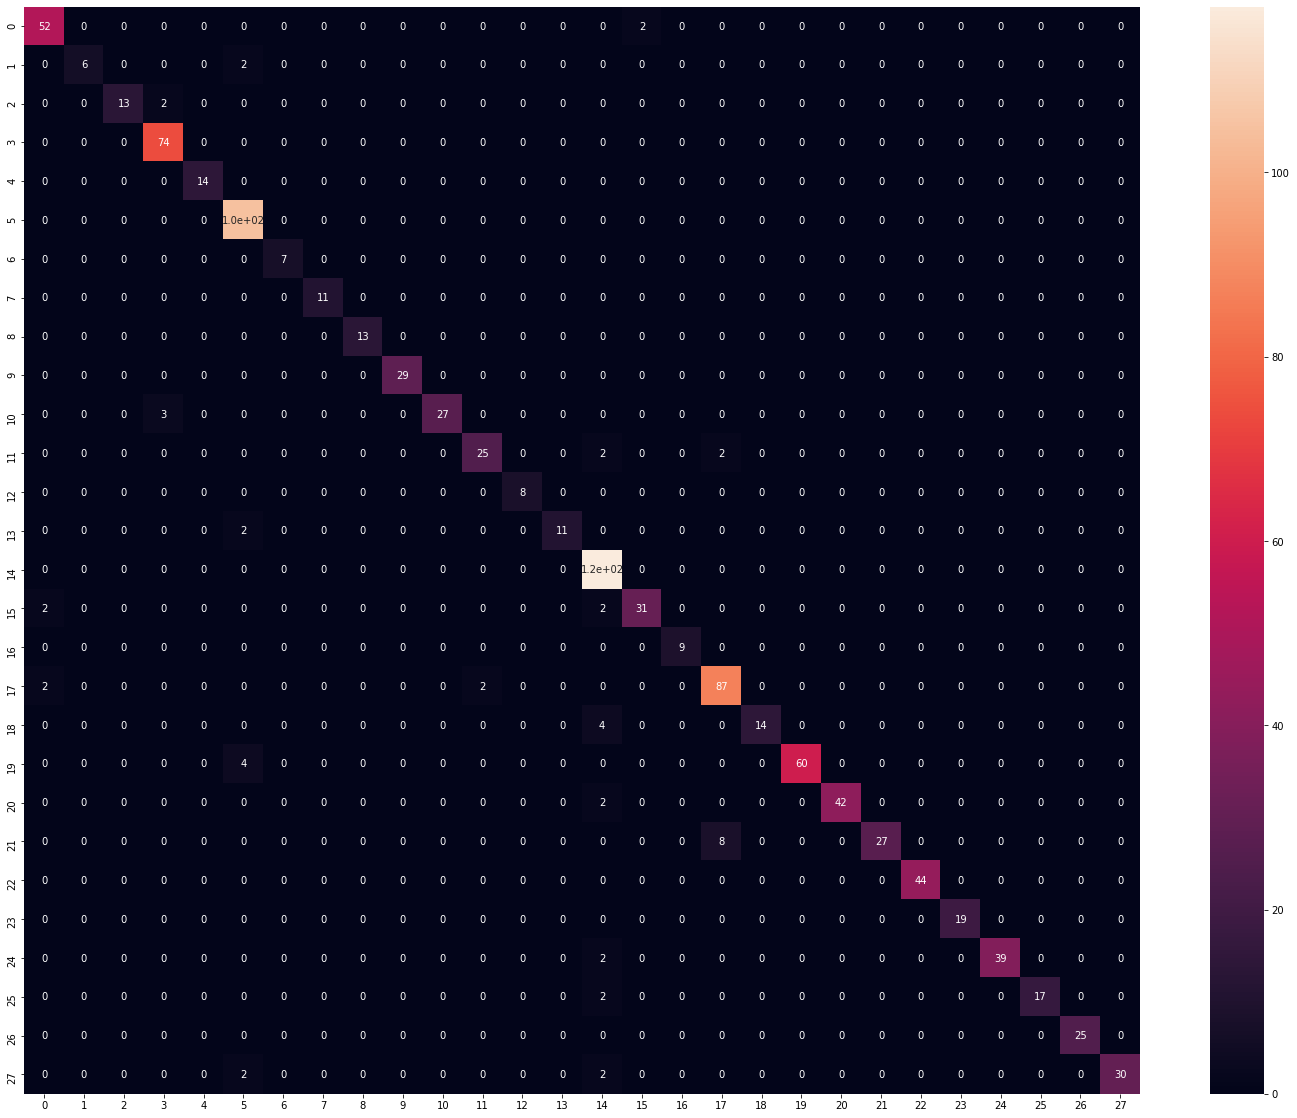

In [43]:
plt.subplots(figsize=(25,20))
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,linewidths=0.0001)

# Model Prediction

In [44]:
pred_data=pd.read_csv('winetest.csv')

In [45]:
pred_data.isnull().any()

user_name              True
country                True
review_title          False
review_description    False
designation            True
points                False
price                  True
province               True
region_1               True
region_2               True
winery                False
dtype: bool

In [52]:
test_review=pred_data['review_description'].str.lower()

In [54]:
test_review

0        nicely differentiated from the companion stewa...
1        charred, smoky, herbal aromas of blackberry tr...
2        slightly sour and funky in earth, this is a re...
3        this concentrated, midnight-black malbec deliv...
4        earthy aromas suggesting grilled porcini, leat...
5        the timid nose squeaks out notes of chinese fi...
6        a structured wine that has berry fruits, black...
7        this is a remarkable value, over-delivering in...
8        staunch herbal aromas of tobacco, olive, rubbe...
9        a blend of 65% chardonnay and 35% pinot nero, ...
10       this offers light berry and melon flavors, wit...
11       equal proportions of the three main champagne ...
12       cut with sulfur, this is a wine whose bitterne...
13       varietally designated pinot noirs are an extre...
14       this black-fruited offering has the winery's s...
15       always the star of sweet wines, this tba riesl...
16       this is a seductive wine, concentrated and ful.

In [55]:
for i in range(len(test_review)):
    test_review.iloc[i]=word_tokenize(test_review.iloc[i])
    test_review.iloc[i]=[w for w in test_review.iloc[i] if not w in stop_words]
    test_review.iloc[i]=" ".join(test_review.iloc[i])

In [56]:
test_review

0        nicely differentiated companion stewart bottli...
1        charred smoky herbal aromas blackberry trend d...
2        slightly sour funky earth restrained white age...
3        concentrated midnight-black malbec delivers ar...
4        earthy aromas suggesting grilled porcini leath...
5        timid nose squeaks notes chinese five spice wa...
6        structured wine berry fruits black currants fi...
7        remarkable value over-delivering terms varieta...
8        staunch herbal aromas tobacco olive rubber van...
9        blend 65 chardonnay 35 pinot nero copper-color...
10       offers light berry melon flavors tart slightly...
11       equal proportions three main champagne grapes ...
12       cut sulfur wine whose bitterness hides potenti...
13       varietally designated pinot noirs extreme rari...
14       black-fruited offering winery signature stamp ...
15       always star sweet wines tba riesling preserves...
16       seductive wine concentrated full bodied entire.

In [57]:
test_vector=vect.transform(test_review)

In [58]:
test_vector=test_vector.toarray()

In [61]:
result_labelled=cls.predict(test_vector)

In [62]:
result_labelled

array([14,  9,  5, ..., 14, 25,  3])

In [64]:
result=label_variety.inverse_transform(result_labelled)

In [65]:
result

array(['Pinot Noir', 'Malbec', 'Chardonnay', ..., 'Pinot Noir',
       'Tempranillo', 'Cabernet Sauvignon'], dtype=object)

In [66]:
result_doc=pd.DataFrame(zip(pred_data['review_description'],result),columns=['review_description','variety'])

In [67]:
print(result_doc)

                                      review_description  \
0      Nicely differentiated from the companion Stewa...   
1      Charred, smoky, herbal aromas of blackberry tr...   
2      Slightly sour and funky in earth, this is a re...   
3      This concentrated, midnight-black Malbec deliv...   
4      Earthy aromas suggesting grilled porcini, leat...   
5      The timid nose squeaks out notes of Chinese fi...   
6      A structured wine that has berry fruits, black...   
7      This is a remarkable value, over-delivering in...   
8      Staunch herbal aromas of tobacco, olive, rubbe...   
9      A blend of 65% Chardonnay and 35% Pinot Nero, ...   
10     This offers light berry and melon flavors, wit...   
11     Equal proportions of the three main Champagne ...   
12     Cut with sulfur, this is a wine whose bitterne...   
13     Varietally designated Pinot Noirs are an extre...   
14     This black-fruited offering has the winery's s...   
15     Always the star of sweet wines, t

In [68]:
result_doc.to_csv('resultdoc.csv')